New names:
* `` -> ...2
* `` -> ...8
Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

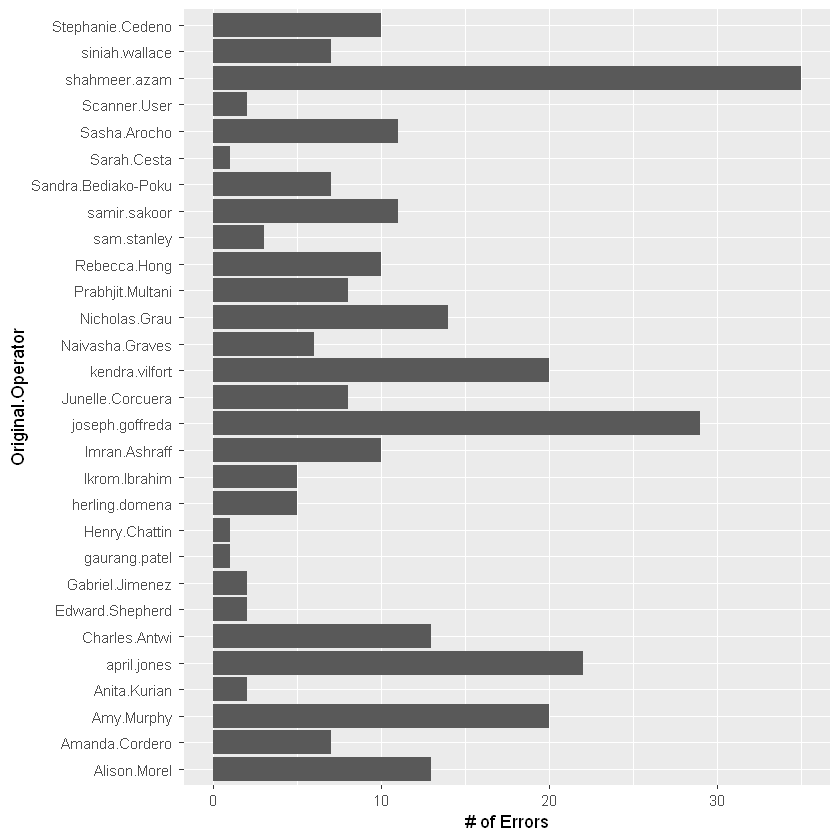

In [37]:
library(readxl)
library(plyr)
library(stringr)
library(ggplot2)
genewiz <- read_excel('Repeat.xlsx')
names(genewiz)<-str_replace_all(names(genewiz), c(" " = "." , "," = "" ))

error<-genewiz

error['Original.Operator']<-sub('@genewiz.com', ' ', genewiz$Original.Operator)

error$error.rate<-(grepl('Straight repeat', error$Repeat.Type) & grepl('TRUE', error$Repeat.Pass.QA ==TRUE))

error2<-subset(error, subset= error.rate==TRUE)

errortest<-count(error2, 'Original.Operator', 'error.rate')

fig1<-(ggplot(errortest, aes(x = Original.Operator, y = freq)) 

    +geom_histogram(stat="identity") 

    +coord_flip()

    +ylab("# of Errors")) 
    
fig1

ggsave("plot2.png", width = 10, height = 10)